# **Projeto de Automação de E-mail**

  O que será feito:

---


    - Pegar uma planilha excel com os gastos.
    - Interpretar a planilha e analisar os gastos totais de cada um os clientes
    - Enviar um e-mail automático pelo python a partir de um servidor

In [222]:
# Função para ler os contatos de um determinado arquivo de contato e retornar um
# lista de nomes e endereços de e-mail
def get_contacts(filename):
    names = []
    emails = []
    with open(filename, mode='r', encoding='utf-8') as contacts_file:
        for a_contact in contacts_file:
            names.append(a_contact.split()[0])
            emails.append(a_contact.split()[1])
    return names, emails

In [223]:
from string import Template

def read_template(filename):
    with open(filename, 'r', encoding='utf-8') as template_file:
        template_file_content = template_file.read()
    return Template(template_file_content)

In [241]:
import smtplib

In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [226]:
import numpy as np
import pandas as pd

In [227]:
df_1 = pd.read_excel('/content/drive/My Drive/vendas/Vendas_case.xlsx')

In [228]:
df_1.head() #dataframe que importa a planilha do projeto

,Cliente,plataforma,user-id,comanda-id,status-pedido,data,modalidade,valor-pedido,valor-desconto,Valor-Pago,forma-de-pagamento
0,Cliente 1,iOS,110769.0,237628.0,Aprovado,2020-01-29 20:04:49,Delivery,23.40,0.00,23.40,Crédito-Elo
1,Cliente 1,Android,229126.0,237629.0,Aprovado,2020-01-29 20:10:15,Delivery,50.90,0.00,50.90,Crédito-MasterCard
2,Cliente 2,iOS,232853.0,237638.0,Aprovado,2020-01-29 20:41:30,Delivery,29.80,-2.98,26.82,Crédito-MasterCard
3,Cliente 1,Android,232846.0,237639.0,Aprovado,2020-01-29 20:42:49,ComerAqui,73.77,0.00,73.77,Crédito-Visa
4,Cliente 1,Android,98014.0,237641.0,Aprovado,2020-01-29 21:12:26,Delivery,27.30,0.00,27.30,Crédito-MasterCard


In [229]:
df_1['Cliente'].isnull().sum() # nenhum dado da planilha parece ser 0 ou outlier

0

In [230]:
data =[['Cliente 1', 0.0]]
df = pd.DataFrame(data,columns=['Nome', 'Total Gasto'])
df.head()  # criação de um esqueleto do dataframe que será futuramente usado para enviar os emails

,Nome,Total Gasto
0,Cliente 1,0.0


In [231]:
def sum_lista(dataframe): # essa função interpreta a planilha do projeto e joga no dataframe que será enviado no email
  i = 0
  k = 1
  for index in df_1['Cliente']:
    
    aux = df.shape[0]

    for j in range(aux):
      bool = 0
      if index in df['Nome'][j]: #se o nome já está contido na planilha -> soma no total gasto
        df['Total Gasto'][j] += df_1['Valor-Pago'][i]
        i += 1
        bool = 1
        break

    if bool == 0:
      df.loc[k] = [index, df_1['Valor-Pago'][i]] #se o nome não está contido na planilha -> cria uma nova linha
      k += 1
      i += 1      

In [232]:
sum_lista(df_1) #chamada da função

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [234]:
df.head() #planilha que será usada para enviar os emails pronta

,Nome,Total Gasto
0,Cliente 1,2.470748e+06
1,Cliente 2,4.984738e+04
2,Cliente 3,8.598816e+05
3,Cliente 4,3.343974e+06
4,Cliente 5,3.543673e+05


In [239]:
names, emails = get_contacts('/content/drive/My Drive/vendas/mycontacts.txt')  # lê contatos
message_template = read_template('/content/drive/My Drive/vendas/messages.txt')

In [236]:
s = smtplib.SMTP('smtp.gmail.com') # entra no servidor smt
s.starttls()
s.login('ehoradejogar@gmail.com', 'shwvafmcilqeyabe')

(235, b'2.7.0 Accepted')

In [240]:
# importa pacotes necessários
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# para cada contato, enviar o email:
for name, email in zip(names, emails):
    msg = MIMEMultipart()       # cria a mensagem

    # adiciona o nome da pessoa ao modelo de mensagem
    message = message_template.substitute(PERSON_NAME=name.title(), PERSON_EMAIL=email.title())

    # parametros necessários para mandar a mensagem
    msg['From']= 'ehoradejogar@gmail.com'
    msg['To']= 'johannesbms1@gmail.com'
    msg['Subject']= "Conjunto de Gastos"

    # adiciona o corpo da mensagem
    msg.attach(MIMEText(message, 'plain'))

    # enviar a mensagem através do servidor configurado anteriormente
    s.send_message(msg)
    
    del msg

**Resultado Final: Sucesso!**

---



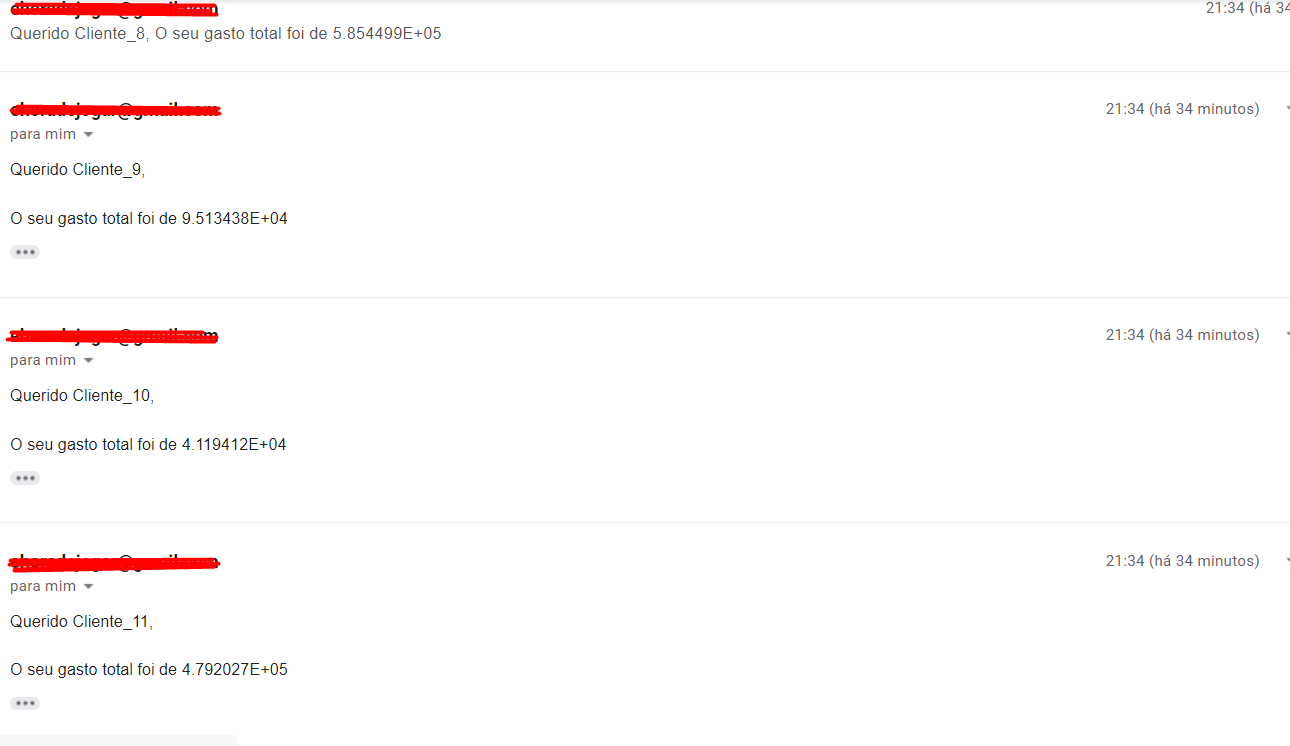